In [41]:
import os
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

features, artists, styles, classes = [], [], [], []
for feature_file in os.listdir('./features'):
    artist, style = feature_file.replace('.npy', '').split('_')[:2]
    feature = np.load(os.path.join('./features', feature_file))
    features.extend([i for i in feature])
    artists.extend([artist] * len(feature))
    styles.extend([style] * len(feature))
    classes.extend([feature_file.replace('.npy', '')] * len(feature))
df = pd.DataFrame({'feature': features, 'artist': artists, 'style': styles, 'class': classes})
df.head()

,feature,artist,style,class
0,"[56.73562, 6.50044, 12.308863, 44.944687, 17.9...",katsushika-hokusai,Ukiyo,katsushika-hokusai_Ukiyo_e
1,"[82.52053, 13.565216, 28.132902, 47.195076, 19...",katsushika-hokusai,Ukiyo,katsushika-hokusai_Ukiyo_e
2,"[36.7088, 3.1800938, 9.584766, 23.814955, 9.94...",katsushika-hokusai,Ukiyo,katsushika-hokusai_Ukiyo_e
3,"[106.34118, 11.329576, 30.536715, 64.30398, 22...",katsushika-hokusai,Ukiyo,katsushika-hokusai_Ukiyo_e
4,"[56.693024, 0.44072086, 6.2117667, 43.641247, ...",katsushika-hokusai,Ukiyo,katsushika-hokusai_Ukiyo_e


In [63]:
# subset = df[df['artist'] == 'pablo-picasso']
# subset = df[df['style'] == 'Impressionism']
# subset = df[(df['style'] == 'Realism') | (df['style'] == 'Impressionism')]
subset = df[(df['class'] == 'claude-monet_Impressionism') | (df['class'] == 'vincent-van-gogh_Realism') | (df['class'] == 'katsushika-hokusai_Ukiyo_e')]
pca = PCA(n_components=50)
pca_50 = pca.fit_transform(np.stack(subset['feature'].values))
print(np.sum(pca.explained_variance_ratio_))

0.9417456


2


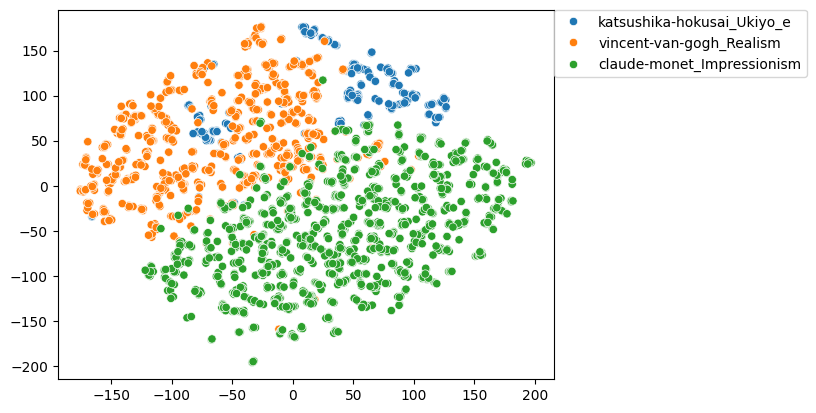

5


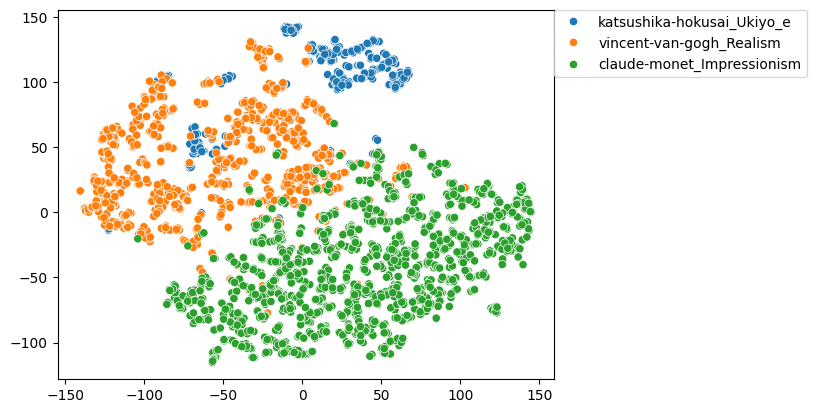

30


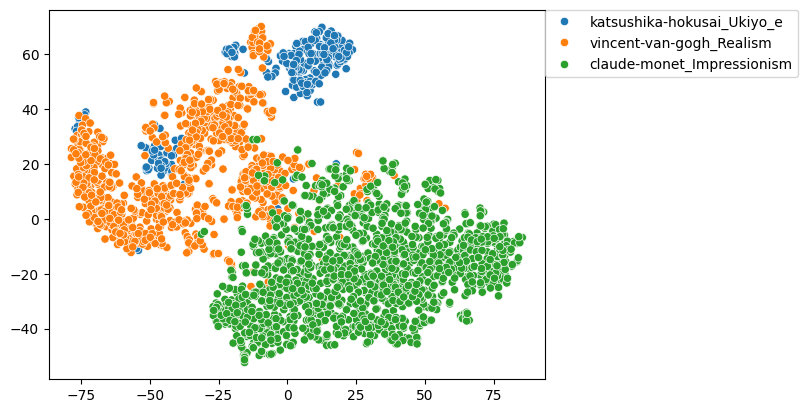

50


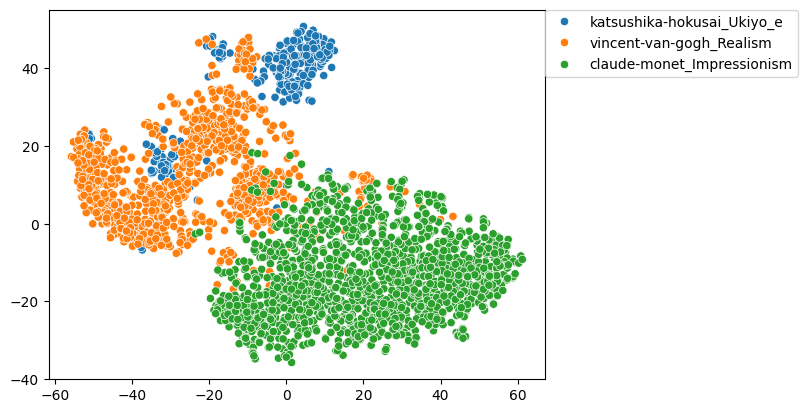

100


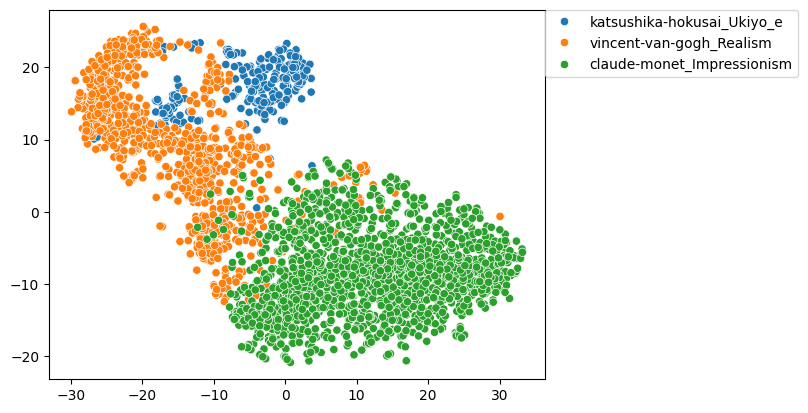

In [64]:
for perplexity in [2, 5, 30, 50, 100]:
    print(perplexity)
    tsne_x, tsne_y = TSNE(perplexity=perplexity, n_iter=5000).fit_transform(pca_50).T
    plt.figure()
    sns.scatterplot(x=tsne_x, y=tsne_y, hue=subset['class'].values)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.show()